In [1]:
from IPython.display import Image, display, Math, Latex

# AI 2A HRI project

*Task oriented SDS*: the goal of the project is to implement a
task-oriented SDS in one of the proposed scenarios.

### Step 1.  Acquire and Install tools for speech processing:
dependency parsing, text-to-speech.
### Step 2. Test the systen pipeline:
Write a program that:
1. acquires a spoken sentence,
2. calls the ASR to get the corresponding text
3. then calls DP
4. prints the dependency graph and,
5. returns some info (e.g. its root) through the text-to-speech.

### Step 3. Implement the task oriented dialog:
(using the above tools) in one of the proposed scenarios

Useful links:
* https://web.stanford.edu/~jurafsky/slp3/ explanation of CoreNLP
* https://www.youtube.com/watch?v=1c_0Ly7tUxY SDS
* https://github.com/explosion/spaCy/issues/259 CoreNLP vs. Spacy
* https://medium.com/@brianray_7981/ai-in-practice-identifying-parts-of-speech-in-python-8a690c7a1a08 different tools
* https://www.analyticsvidhya.com/blog/2017/04/natural-language-processing-made-easy-using-spacy-%E2%80%8Bin-python/ using spacy
* https://cindyxiaoxiaoli.wordpress.com/2017/04/10/how-to-use-stanford-corenlp-in-python/

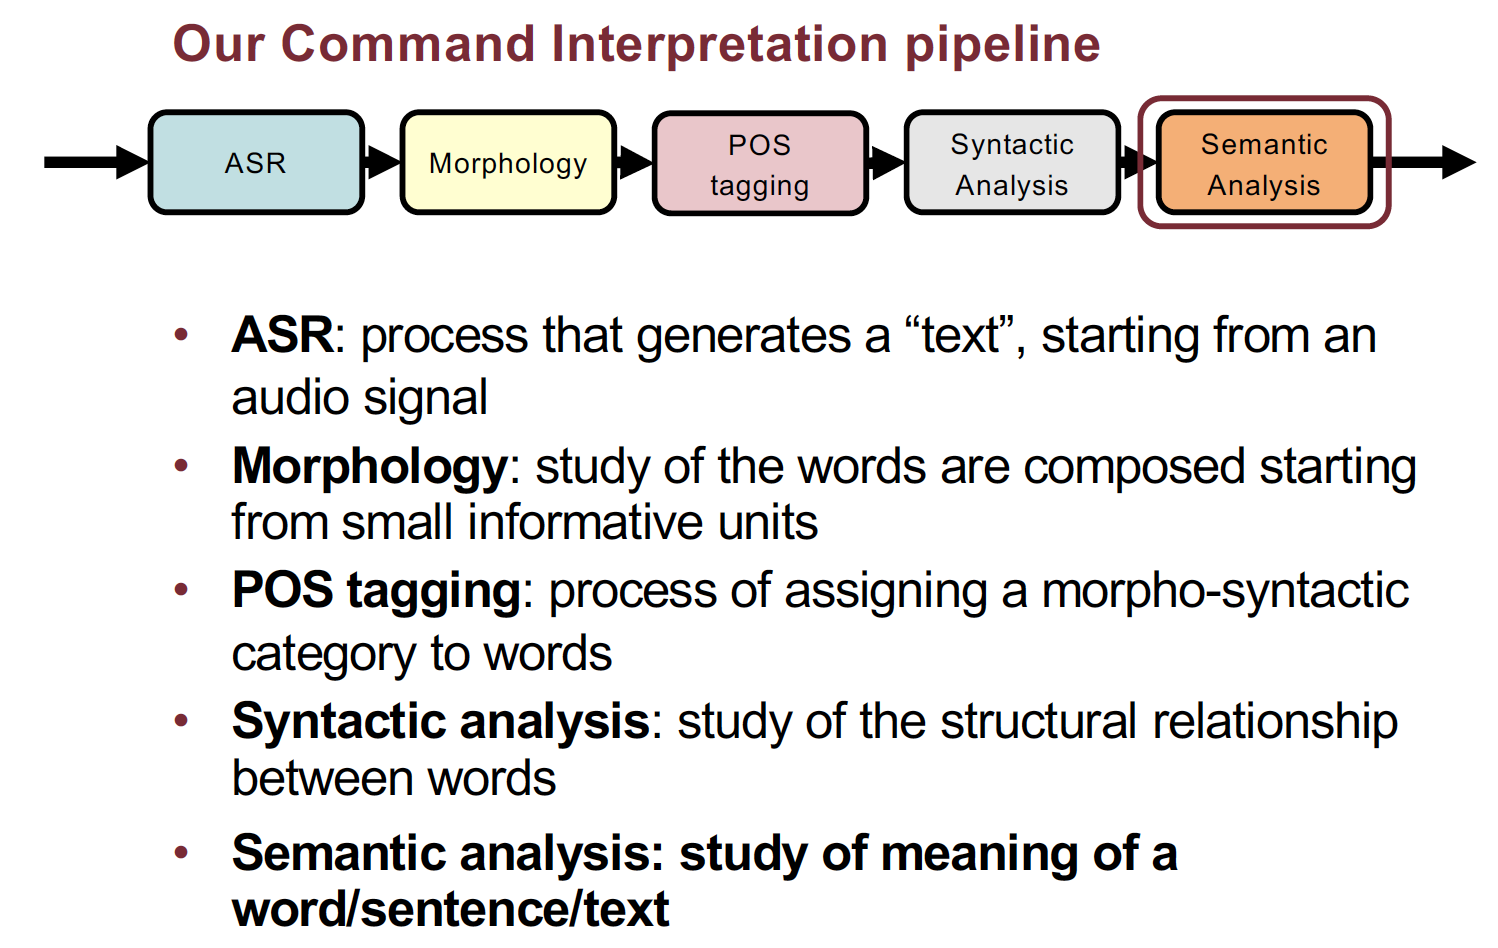

In [2]:
Image(filename='pipeline.png', width = 450, height = 450)

In [3]:
import speech_recognition as sr
from stanfordcorenlp import StanfordCoreNLP
import logging
import json
import os
import random
import spacy
from spacy import displacy

In [4]:
def system_listen():
    r = sr.Recognizer()                 
    with sr.Microphone() as source:
        while True:
            print("Listening... :")
            audio = r.listen(source)       
            print("Done, now processing...")
            try:
                text = r.recognize_google(audio)    
                print("You: {}".format(text))
                break
            except:
                print("Sorry could not recognize your voice, please try again")    
    return text
    
def system_speak(string):
    print("Bartender: {}".format(string))
    return os.system("say " + string)

def system_display(text, style_ = 'bw'):
    '''
    bw - black and white
    c - colour
    '''
    nlp = spacy.load('en')
    doc = nlp(text)
    if style_ == 'bw':
        displacy.render(doc, style='dep', jupyter=True)
        
    elif style_ == 'c':
        options = {'compact': True, 'bg': '#09a3d5',
               'color': 'white', 'font': 'Source Sans Pro'}
        displacy.render(doc, style='dep', jupyter=True, options=options)
        
    return doc

nouns = lambda doc: ([str(i) for i in doc if i.pos == spacy.symbols.NOUN])

In [5]:
upper_first = lambda x : x[0].upper() + x[1:]
lower_first = lambda x : x[0].lower() + x[1:]

f = open('rum_drinks.txt').readlines()

drinks = {}
for i in f:
    if i.startswith("Alcoholic"):
        category = lower_first(i.split(" ")[-1].split("\n")[0])
        drinks[category] = []
    else:
        x = i.split("\n")
        if len(x)==2:
            drinks[category].append(x[0])
        else:
            drinks[category].append(x)


# Scenario: 
You are at a bar on a Friday after a long work-week, you want to drink but are unsure of what exactly. Hence you ask the bartender what can he recommend you.

In [ ]:
system_speak("Long day huh? What do you want to drink?")

system_speak("I can make you a drink with either")
for ind, val in enumerate(list(drinks.keys())):
    if ind == len(list(drinks.keys())) - 1:
        system_speak("or "+ val)
    else:
        system_speak(val)
###
#first part of listening
###
        
text = system_listen()
doc = system_display(text, style_='c') 

###
#second part of listening
###
       

drink_type_recognized = False
for i in nouns(doc):
    if i in list(drinks.keys()):
        drink_type_recognized = True
        choice = i 

system_speak("Great choice! We have the finest selection of " + choice)
system_speak("Do you have any specific drink with " + choice + "in mind?")

text = system_listen()
doc = system_display(text, style_='c')

###
#third part of listening
###

for token in doc:
    if token.pos == spacy.symbols.INTJ:
        decision = str(token)

if decision == 'no':
    system_speak("Let me offer you something")
    choice_made = False
    while not choice_made:
        drink = random.choice(drinks[choice])
        system_speak("Okay, How about I make you a " + drink)
        text = system_listen()
        doc = system_display(text, style_='c')
        
        for token in doc:
            if token.pos == spacy.symbols.INTJ or token.pos == spacy.symbols.ADJ:
                if str(token) in ['ok', 'sure', 'great', 'yes']:
                    system_speak("great, starting to prepare it right now")
                    choice_made = True
        
    system_speak("Here you go, a nice cold "+ drink)
elif decision == 'yes':
    system_speak("great, so what do you want me to make?")
    
    while True:
        text = system_listen()
        doc = system_display(text, style_='c')
        t = []
        for token in doc:
            if token.pos == spacy.symbols.ADJ or token.pos == spacy.symbols.NOUN:
                t.append(str(token))
        
        
        text = " ".join([upper_first(i) for i in t])
        print(text)
        if not text in drinks[choice]:
            system_speak("sorry, we don't have that here, maybe something else?")
        else:
            system_speak("Okay great, preparing a "+ text)
            drink = text
            break
            
    system_speak("Here you go, a nice cold "+ drink)

Bartender: Long day huh? What do you want to drink?
Bartender: I can make you a drink with either
Bartender: vodka
Bartender: rum
Bartender: gin
Bartender: brandy
Bartender: tequila
Bartender: whiskey
Bartender: wine
Bartender: or liqueur
Listening... :
Done, now processing...
You: I want to drink with whiskey


Bartender: Great choice! We have the finest selection of whiskey
